## load our dependencies

In [23]:
import pandas as pd
import re

# load our dataframe

In [24]:
audible_path = './audible_uncleaned.csv'
audible_df = pd.read_csv(audible_path)

print("Audible Info")
print("*" * 45)
print(audible_df.info())
print("*" * 45)

print()

print("Audible Shape")
print("*" * 15)
print(audible_df.shape)
print("*" * 15)

Audible Info
*********************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87489 entries, 0 to 87488
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         87489 non-null  object
 1   author       87489 non-null  object
 2   narrator     87489 non-null  object
 3   time         87489 non-null  object
 4   releasedate  87489 non-null  object
 5   language     87489 non-null  object
 6   stars        87489 non-null  object
 7   price        87489 non-null  object
dtypes: object(8)
memory usage: 5.3+ MB
None
*********************************************

Audible Shape
***************
(87489, 8)
***************


In [25]:
# Convert 'releasedate' to datetime format
audible_df['releasedate'] = pd.to_datetime(audible_df['releasedate'], format='%d-%m-%y', errors='coerce')

# Find the earliest and latest dates
earliest_date = audible_df['releasedate'].min()
latest_date = audible_df['releasedate'].max()

print("The earliest date in the dataset is:", earliest_date)
print("The latest date in the dataset is:", latest_date)


The earliest date in the dataset is: 1998-12-27 00:00:00
The latest date in the dataset is: 2025-11-14 00:00:00


# checking all unique Languages 🗺️ and dropping all but English and Spanish

In [26]:
# Check unique language values
unique_languages = audible_df['language'].unique()
print("Unique languages:", unique_languages)

# Filter the DataFrame to keep only English and Spanish entries
audible_df = audible_df[audible_df['language'].isin(['English', 'Spanish'])]


Unique languages: ['English' 'Hindi' 'spanish' 'german' 'french' 'catalan' 'swedish'
 'italian' 'danish' 'finnish' 'dutch' 'hebrew' 'russian' 'polish'
 'galician' 'afrikaans' 'icelandic' 'romanian' 'japanese' 'tamil'
 'portuguese' 'urdu' 'hungarian' 'czech' 'bulgarian' 'mandarin_chinese'
 'basque' 'korean' 'arabic' 'greek' 'turkish' 'ukrainian' 'slovene'
 'norwegian' 'telugu' 'lithuanian']


# extract info from 'stars'

##### '**4.5 out of 5 stars41 ratings**' ➡️ stars: 4.5 | ratings: 41 | rated: yes

##### '**Not rated yet**' ➡️ stars: NaN | ratings: NaN | rated: no 

In [27]:
# Rename Stars to use it with correct float values
audible_df.rename(columns={'stars': 'original_stars'}, inplace=True)

# Step 1: Extract star ratings as float
audible_df['stars'] = audible_df['original_stars'].str.extract(r'(\d+\.?\d*)').astype(float)

# Step 2: Extract rating counts as integers
audible_df['ratings'] = audible_df['original_stars'].str.extract(r'(\d+) ratings').astype(float)

# Step 3: Add 'rated' field
audible_df['rated'] = audible_df['original_stars'].apply(lambda x: 'no' if 'Not rated yet' in x else 'yes')

# Drop the original 'stars' column if it's no longer needed
audible_df.drop(columns=['original_stars'], inplace=True)

In [28]:
print("*" * 100)
print(audible_df[['stars', 'ratings', 'rated']].head())
print("*" * 100)

****************************************************************************************************
   stars  ratings rated
0    5.0     34.0   yes
1    4.5     41.0   yes
2    4.5     38.0   yes
3    4.5     12.0   yes
4    4.5    181.0   yes
****************************************************************************************************


# split 'releasedate' into more attributes

##### '**04-08-08**' ➡️ month: 04 | day: 08 | year: 08

In [29]:
import pandas as pd

# Convert 'releasedate' to datetime format with day-first order
releasedate_parsed = pd.to_datetime(audible_df['releasedate'], format='%d-%m-%y', errors='coerce')

# Add extracted month, day, and year as new columns in the DataFrame
audible_df['month'] = releasedate_parsed.dt.month
audible_df['day'] = releasedate_parsed.dt.day
audible_df['year'] = releasedate_parsed.dt.year

# Display the DataFrame with the new columns
print(audible_df.head())


                                         name                     author  \
0                  Geronimo Stilton #11 & #12  Writtenby:GeronimoStilton   
1                            The Burning Maze      Writtenby:RickRiordan   
2                                The Deep End       Writtenby:JeffKinney   
3                        Daughter of the Deep      Writtenby:RickRiordan   
4  The Lightning Thief: Percy Jackson, Book 1      Writtenby:RickRiordan   

                    narrator                time releasedate language   price  \
0      Narratedby:BillLobely   2 hrs and 20 mins  2008-08-04  English  468.00   
1   Narratedby:RobbieDaymond   13 hrs and 8 mins  2018-05-01  English  820.00   
2      Narratedby:DanRussell    2 hrs and 3 mins  2020-11-06  English  410.00   
3  Narratedby:SoneelaNankani  11 hrs and 16 mins  2021-10-05  English  615.00   
4  Narratedby:JesseBernstein              10 hrs  2010-01-13  English  820.00   

   stars  ratings rated  month  day  year  
0    5.0    

In [30]:
print(audible_df.info)

<bound method DataFrame.info of                                              name                     author  \
0                      Geronimo Stilton #11 & #12  Writtenby:GeronimoStilton   
1                                The Burning Maze      Writtenby:RickRiordan   
2                                    The Deep End       Writtenby:JeffKinney   
3                            Daughter of the Deep      Writtenby:RickRiordan   
4      The Lightning Thief: Percy Jackson, Book 1      Writtenby:RickRiordan   
...                                           ...                        ...   
87484                   Last Days of the Bus Club     Writtenby:ChrisStewart   
87485                                    The Alps    Writtenby:StephenO'Shea   
87486                        The Innocents Abroad        Writtenby:MarkTwain   
87487                       A Sentimental Journey   Writtenby:LaurenceSterne   
87488                                      Havana    Writtenby:MarkKurlansky   

       

In [31]:
print("*" * 100)
print(audible_df[['day', 'month', 'year']].head())
print("*" * 100)

****************************************************************************************************
   day  month  year
0    4      8  2008
1    1      5  2018
2    6     11  2020
3    5     10  2021
4   13      1  2010
****************************************************************************************************


In [32]:
print(audible_df.info)

<bound method DataFrame.info of                                              name                     author  \
0                      Geronimo Stilton #11 & #12  Writtenby:GeronimoStilton   
1                                The Burning Maze      Writtenby:RickRiordan   
2                                    The Deep End       Writtenby:JeffKinney   
3                            Daughter of the Deep      Writtenby:RickRiordan   
4      The Lightning Thief: Percy Jackson, Book 1      Writtenby:RickRiordan   
...                                           ...                        ...   
87484                   Last Days of the Bus Club     Writtenby:ChrisStewart   
87485                                    The Alps    Writtenby:StephenO'Shea   
87486                        The Innocents Abroad        Writtenby:MarkTwain   
87487                       A Sentimental Journey   Writtenby:LaurenceSterne   
87488                                      Havana    Writtenby:MarkKurlansky   

       

# fix 'author' and 'narrator' to exclude _______by:

****some books may have multiple authors****

##### 'Writtenby:GeronimoStilton' ➡️ author: Geronimo Stilton 
##### 'Writtenby:RonaldL.Smith' ➡️ author: Ronald L. Smith 
##### 'Writtenby:HumzaArshad,HenryWhite' ➡️ author: Humza Arshad, Henry White 

##### 'Narratedby:BillLobely' ➡️ narrator: Bill Lobely 

In [33]:
# Remove 'Writtenby:' prefix and add spaces between names for 'author' field
audible_df['author'] = audible_df['author'].str.replace('Writtenby:', '', regex=False)
audible_df['author'] = audible_df['author'].apply(lambda x: re.sub(r'(\w)([A-Z])', r'\1 \2', ', '.join(x.split(','))))

# Remove 'Narratedby:' prefix and add spaces between names for 'narrator' field
audible_df['narrator'] = audible_df['narrator'].str.replace('Narratedby:', '', regex=False)
audible_df['narrator'] = audible_df['narrator'].apply(lambda x: re.sub(r'(\w)([A-Z])', r'\1 \2', x))


In [34]:
print("*" * 100)
print(audible_df[['author', 'narrator']].head())
print("*" * 100)

****************************************************************************************************
             author         narrator
0  Geronimo Stilton      Bill Lobely
1      Rick Riordan   Robbie Daymond
2       Jeff Kinney      Dan Russell
3      Rick Riordan  Soneela Nankani
4      Rick Riordan  Jesse Bernstein
****************************************************************************************************


# convert time into minutes for better use of units

##### '**time:11 hrs and 16 mins**' ➡️  minutes: 676

In [35]:
# Use lambda function to convert time to minutes
audible_df['minutes'] = audible_df['time'].apply(
    lambda x: (
        (int(re.search(r'(\d+)\s*hr', x).group(1)) * 60 if re.search(r'(\d+)\s*hr', x) else 0) +
        (int(re.search(r'(\d+)\s*min', x).group(1)) if re.search(r'(\d+)\s*min', x) else 0)
    )
)

In [36]:
print("*" * 100)
print(audible_df[['time']].head())
print("*" * 100)
print("*" * 100)
print(audible_df[['minutes']].head())
print("*" * 100)

****************************************************************************************************
                 time
0   2 hrs and 20 mins
1   13 hrs and 8 mins
2    2 hrs and 3 mins
3  11 hrs and 16 mins
4              10 hrs
****************************************************************************************************
****************************************************************************************************
   minutes
0      140
1      788
2      123
3      676
4      600
****************************************************************************************************


# convert price from INR to USD

*exchange rate from 04/11/2022 from when data was scraped*

##### **'price: 468'** ➡️ price_usd: xxxx

In [37]:
# Replace "Free" with "0" and remove commas
audible_df['price'] = audible_df['price'].replace("Free", "0").str.replace(',', '')

# Convert the 'price' column to numeric
audible_df['price'] = pd.to_numeric(audible_df['price'], errors='coerce')

# Use the historical exchange rate from April 11, 2022
historical_exchange_rate = 76.0  # 1 USD = 76 INR

# Convert the 'price' column from INR to USD
audible_df['price_usd'] = audible_df['price'] / historical_exchange_rate

# Round to two decimal places for clarity
audible_df['price_usd'] = audible_df['price_usd'].round(2)


In [38]:
print("*" * 100)
print(audible_df[['price', 'price_usd']].head())
print("*" * 100)

****************************************************************************************************
   price  price_usd
0  468.0       6.16
1  820.0      10.79
2  410.0       5.39
3  615.0       8.09
4  820.0      10.79
****************************************************************************************************


In [39]:
print("Final Table")
audible_df = audible_df[['name','author','narrator','time','minutes','releasedate','month', 'day', 'year','language','stars','rated','ratings','price','price_usd']]
audible_df['name'] = audible_df['name'].astype(str)
audible_df.to_csv('audible_output.csv', index=False)
print(audible_df.head())

Final Table
                                         name            author  \
0                  Geronimo Stilton #11 & #12  Geronimo Stilton   
1                            The Burning Maze      Rick Riordan   
2                                The Deep End       Jeff Kinney   
3                        Daughter of the Deep      Rick Riordan   
4  The Lightning Thief: Percy Jackson, Book 1      Rick Riordan   

          narrator                time  minutes releasedate  month  day  year  \
0      Bill Lobely   2 hrs and 20 mins      140  2008-08-04      8    4  2008   
1   Robbie Daymond   13 hrs and 8 mins      788  2018-05-01      5    1  2018   
2      Dan Russell    2 hrs and 3 mins      123  2020-11-06     11    6  2020   
3  Soneela Nankani  11 hrs and 16 mins      676  2021-10-05     10    5  2021   
4  Jesse Bernstein              10 hrs      600  2010-01-13      1   13  2010   

  language  stars rated  ratings  price  price_usd  
0  English    5.0   yes     34.0  468.0      

In [40]:
print(audible_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 61884 entries, 0 to 87488
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   name         61884 non-null  object        
 1   author       61884 non-null  object        
 2   narrator     61884 non-null  object        
 3   time         61884 non-null  object        
 4   minutes      61884 non-null  int64         
 5   releasedate  61884 non-null  datetime64[ns]
 6   month        61884 non-null  int32         
 7   day          61884 non-null  int32         
 8   year         61884 non-null  int32         
 9   language     61884 non-null  object        
 10  stars        14590 non-null  float64       
 11  rated        61884 non-null  object        
 12  ratings      8897 non-null   float64       
 13  price        61884 non-null  float64       
 14  price_usd    61884 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int32(3), int64(1), obje

In [41]:

# Convert to string type
audible_df['language'] = audible_df['language'].astype(str)
audible_df['rated'] = audible_df['rated'].astype(str)

# Convert to integer type, handling non-numeric values if necessary
audible_df['minutes'] = pd.to_numeric(audible_df['minutes'], errors='coerce').fillna(0).astype(int)
audible_df['month'] = pd.to_numeric(audible_df['month'], errors='coerce').fillna(0).astype(int)
audible_df['day'] = pd.to_numeric(audible_df['day'], errors='coerce').fillna(0).astype(int)
audible_df['year'] = pd.to_numeric(audible_df['year'], errors='coerce').fillna(0).astype(int)
audible_df['ratings'] = pd.to_numeric(audible_df['ratings'], errors='coerce').fillna(0).astype(int)

# Convert remaining columns to float type
audible_df['stars'] = audible_df['stars'].astype(float)
audible_df['price'] = audible_df['price'].astype(float)
audible_df['price_usd'] = audible_df['price_usd'].astype(float)

# Verify final data types
print(audible_df.dtypes)

name                   object
author                 object
narrator               object
time                   object
minutes                 int64
releasedate    datetime64[ns]
month                   int64
day                     int64
year                    int64
language               object
stars                 float64
rated                  object
ratings                 int64
price                 float64
price_usd             float64
dtype: object


In [42]:
# Perform stratified sampling by language (10% sample size for each language group)
stratified_sample = audible_df.groupby('month', group_keys=False).apply(lambda x: x.sample(frac=0.1, random_state=42))

# Display the stratified sample
print("Stratified Sample by Month")
print(stratified_sample['month'].value_counts(normalize=True))  # Show proportion for each language in the sample
print(stratified_sample.head())


Stratified Sample by Month
month
3     0.105816
10    0.096769
2     0.092892
11    0.084330
12    0.082391
1     0.081745
9     0.081260
4     0.078675
8     0.076898
7     0.075283
5     0.073021
6     0.070921
Name: proportion, dtype: float64
                                                  name         author  \
461    Ivy & Bean Take Care of the Babysitter (Book 4)  Annie Barrows   
50684                                 The Winter Guest       W.C.Ryan   
60193                                  Chasing Secrets    Brandt Legg   
83373                                              Win  Vera Nazarian   
32267                                  Old Man Country  Thomas R.Cole   

               narrator                time  minutes releasedate  month  day  \
461      Hallie Ricardo    1 hr and 11 mins       71  2022-01-04      1    4   
50684     Liam Hourican    9 hrs and 5 mins      545  2022-01-06      1    6   
60193       Roger Wayne  22 hrs and 29 mins     1349  2022-01-25      1   2

/var/folders/09/_ffptp312fj33qw8f8_zqqgc0000gn/T/ipykernel_19548/317001460.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  stratified_sample = audible_df.groupby('month', group_keys=False).apply(lambda x: x.sample(frac=0.1, random_state=42))


In [43]:
# Choose specific years as clusters, for example, 2020 and 2021
selected_years = [2000, 2005, 2010, 2015, 2020]

# Filter the dataset to include only the selected clusters (years)
cluster_sample = audible_df[audible_df['year'].isin(selected_years)]

# Display the cluster sample
print("Cluster Sample by Year")
print(cluster_sample['year'].value_counts())  # Show the distribution of selected years in the sample
print(cluster_sample.head())


Cluster Sample by Year
year
2020    7656
2015    2379
2010    1193
2005     330
2000     189
Name: count, dtype: int64
                                             name        author  \
2                                    The Deep End   Jeff Kinney   
4      The Lightning Thief: Percy Jackson, Book 1  Rick Riordan   
10       The Titan's Curse: Percy Jackson, Book 3  Rick Riordan   
20                              The Tower of Nero  Rick Riordan   
24  Percy Jackson and the Battle of the Labyrinth  Rick Riordan   

           narrator                time  minutes releasedate  month  day  \
2       Dan Russell    2 hrs and 3 mins      123  2020-11-06     11    6   
4   Jesse Bernstein              10 hrs      600  2010-01-13      1   13   
10  Jesse Bernstein   8 hrs and 48 mins      528  2010-01-14      1   14   
20   Robbie Daymond  12 hrs and 12 mins      732  2020-10-06     10    6   
24  Jesse Bernstein  10 hrs and 32 mins      632  2010-01-21      1   21   

    year language  st

In [50]:
print(max(audible_df['minutes'].unique()))

8595


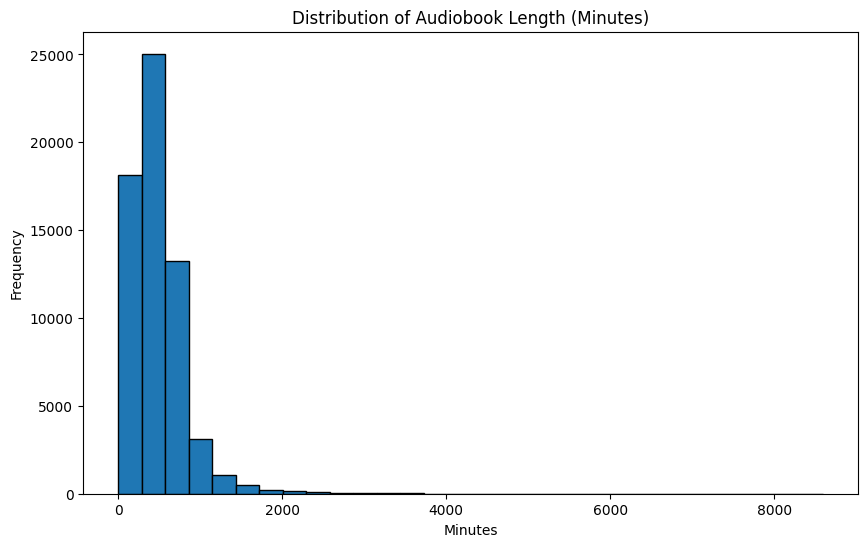

In [44]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(audible_df['minutes'], bins=30, edgecolor='black')
plt.title("Distribution of Audiobook Length (Minutes)")
plt.xlabel("Minutes")
plt.ylabel("Frequency")
plt.show()

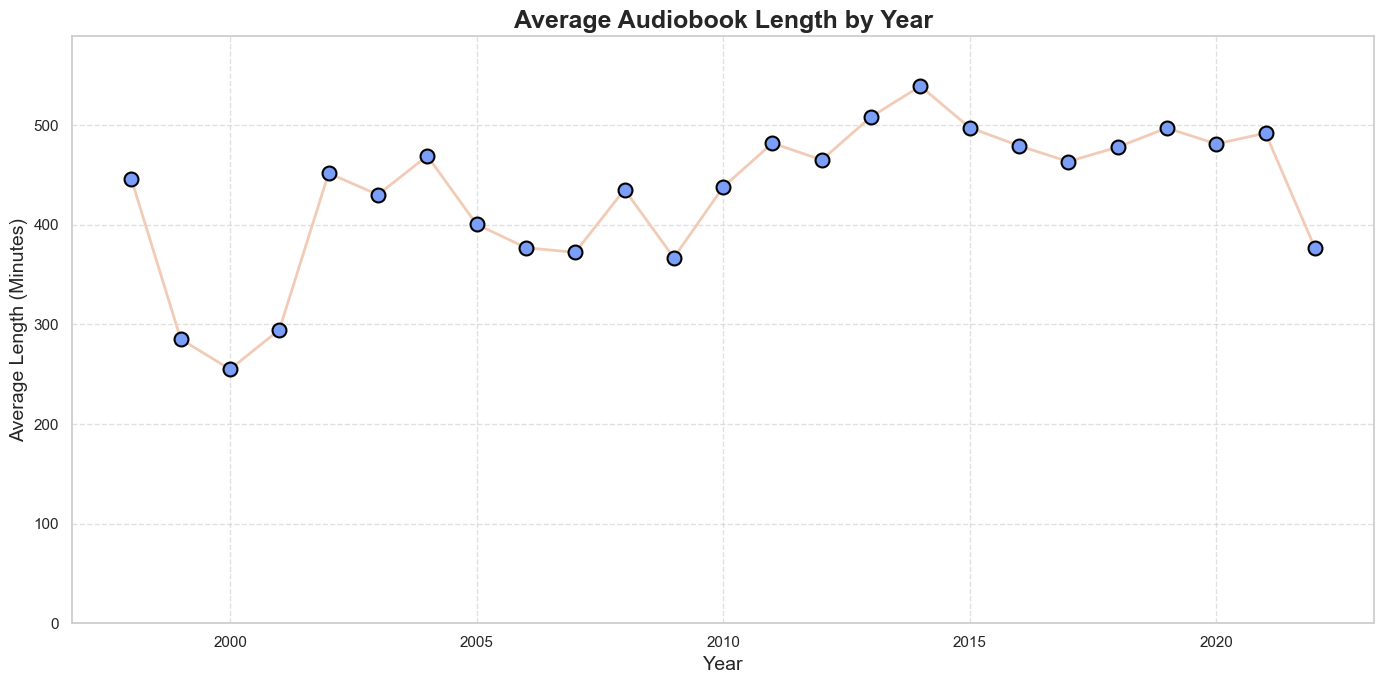

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style and color palette
sns.set(style="whitegrid")
palette = sns.color_palette("coolwarm", as_cmap=True)  # Using a modern color palette

# Calculate average audiobook length (minutes) by year
avg_length_per_year = audible_df.groupby('year')['minutes'].mean()

# Plot the results with enhanced styling
plt.figure(figsize=(14, 7))
plt.plot(
    avg_length_per_year.index, 
    avg_length_per_year.values, 
    marker='o', 
    linestyle='-', 
    linewidth=2, 
    markersize=8, 
    color=palette(0.6)  # Pick a color from the coolwarm palette
)

# Add background color to points for better visibility
for year, avg_length in zip(avg_length_per_year.index, avg_length_per_year.values):
    plt.plot(year, avg_length, 'o', markersize=10, color=palette(0.2), markeredgecolor="black", markeredgewidth=1.5)

# Add titles and labels with larger fonts
plt.title("Average Audiobook Length by Year", fontsize=18, fontweight='bold')
plt.xlabel("Year", fontsize=14)
plt.ylabel("Average Length (Minutes)", fontsize=14)

# Customize grid and limit y-axis for better readability
plt.grid(True, linestyle='--', alpha=0.6)
plt.ylim(0, avg_length_per_year.max() + 50)  # Set a bit of padding on top for aesthetics

# Show plot with tight layout
plt.tight_layout()
plt.show()


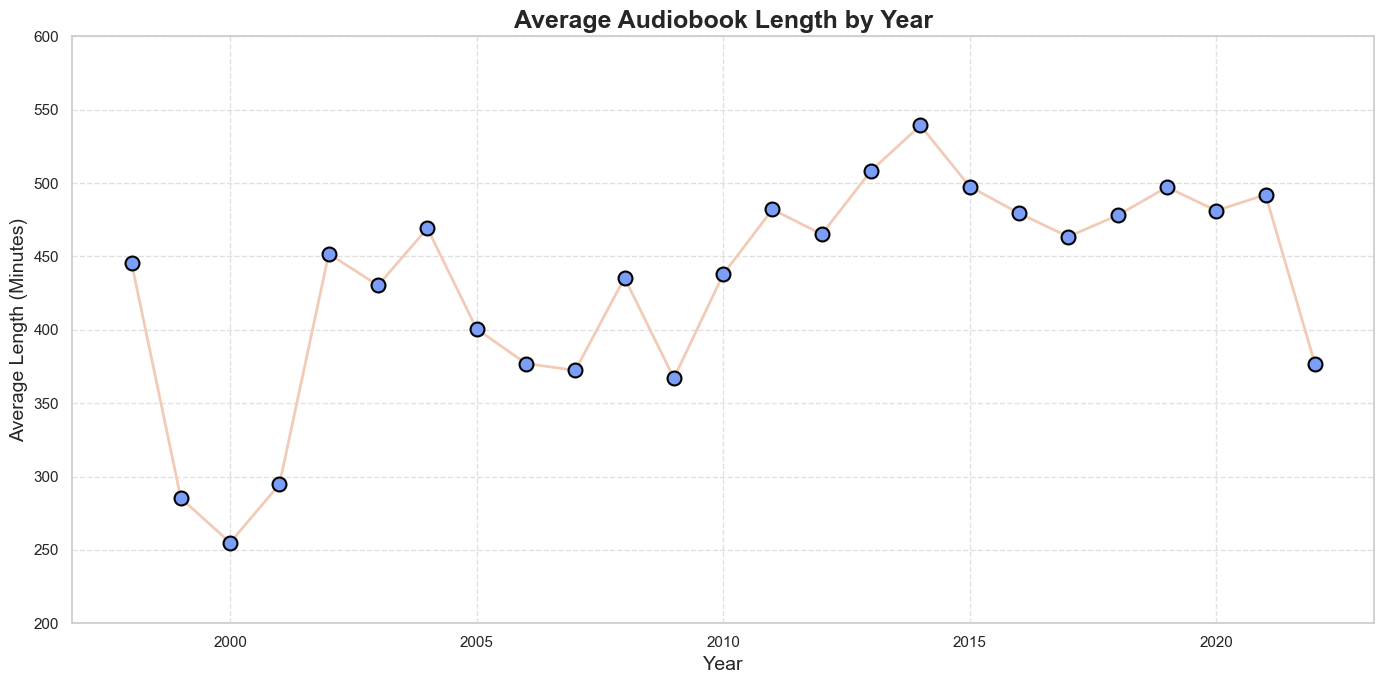

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style and color palette
sns.set(style="whitegrid")
palette = sns.color_palette("coolwarm", as_cmap=True)

# Calculate average audiobook length (minutes) by year
avg_length_per_year = audible_df.groupby('year')['minutes'].mean()

# Plot with enhanced styling and focused y-axis range
plt.figure(figsize=(14, 7))
plt.plot(
    avg_length_per_year.index, 
    avg_length_per_year.values, 
    marker='o', 
    linestyle='-', 
    linewidth=2, 
    markersize=8, 
    color=palette(0.6)  
)

# Add a distinct style to points for better visibility
for year, avg_length in zip(avg_length_per_year.index, avg_length_per_year.values):
    plt.plot(year, avg_length, 'o', markersize=10, color=palette(0.2), markeredgecolor="black", markeredgewidth=1.5)

# Titles and labels with larger fonts
plt.title("Average Audiobook Length by Year", fontsize=18, fontweight='bold')
plt.xlabel("Year", fontsize=14)
plt.ylabel("Average Length (Minutes)", fontsize=14)

# Set y-axis limits to focus on values between 200 and 600 minutes
plt.ylim(200, 600)

# Customize grid for a clean look
plt.grid(True, linestyle='--', alpha=0.6)

# Show plot with tight layout
plt.tight_layout()
plt.show()


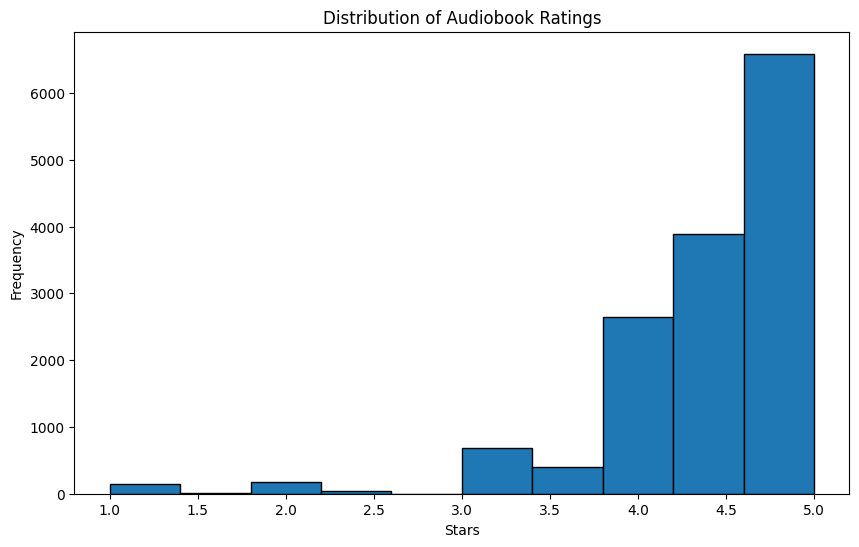

In [45]:
plt.figure(figsize=(10, 6))
plt.hist(audible_df['stars'].dropna(), bins=10, edgecolor='black')
plt.title("Distribution of Audiobook Ratings")
plt.xlabel("Stars")
plt.ylabel("Frequency")
plt.show()


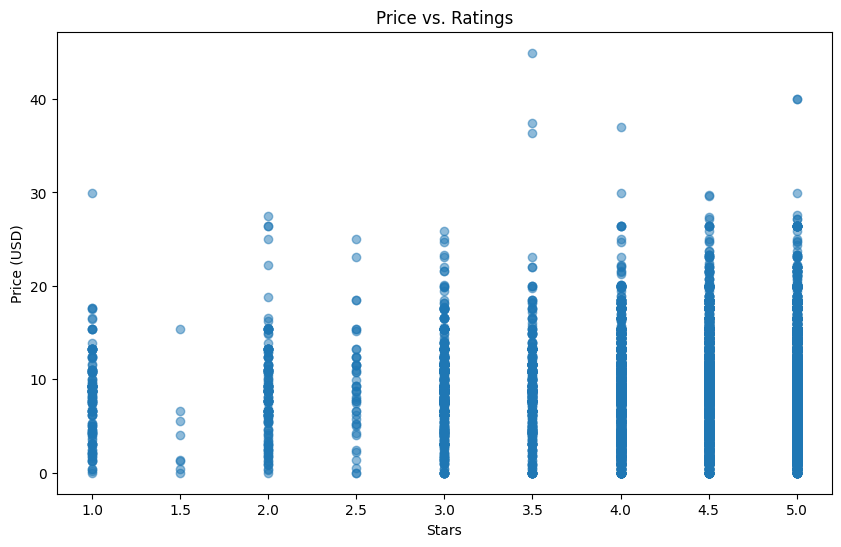

In [46]:
plt.figure(figsize=(10, 6))
plt.scatter(audible_df['stars'], audible_df['price_usd'], alpha=0.5)
plt.title("Price vs. Ratings")
plt.xlabel("Stars")
plt.ylabel("Price (USD)")
plt.show()


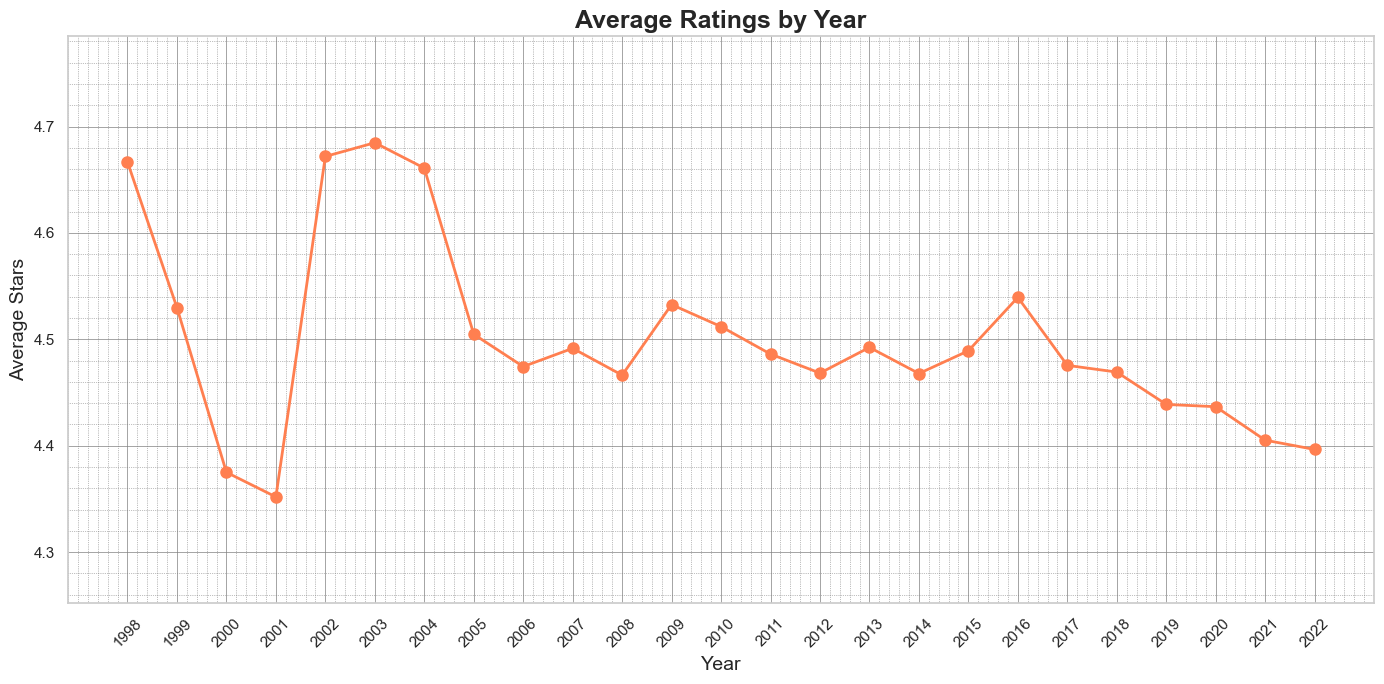

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style and palette
sns.set(style="whitegrid")

# Calculate average ratings per year
avg_ratings_per_year = audible_df.groupby('year')['stars'].mean()

# Define y-axis limits based on the minimum and maximum values in the data
y_min = avg_ratings_per_year.min() - 0.1  # Add a slight margin for clarity
y_max = avg_ratings_per_year.max() + 0.1

# Plot with enhancements
plt.figure(figsize=(14, 7))
plt.plot(
    avg_ratings_per_year.index, 
    avg_ratings_per_year.values, 
    marker='o', 
    linestyle='-', 
    linewidth=2, 
    markersize=8, 
    color='coral'
)

# Adding labels, title, and grid
plt.title("Average Ratings by Year", fontsize=18, fontweight='bold')
plt.xlabel("Year", fontsize=14)
plt.ylabel("Average Stars", fontsize=14)

# Set custom y-axis limits based on data
plt.ylim(y_min, y_max)
plt.xticks(avg_ratings_per_year.index, rotation=45)

# Adding minor gridlines and customizing major gridlines
plt.grid(which='major', linestyle='-', linewidth='0.5', color='gray')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='gray')
plt.minorticks_on()  # Enable minor ticks for finer granularity

# Show the plot
plt.tight_layout()
plt.show()


In [48]:
print("Unique years:", audible_df['year'].unique())


Unique years: [2008 2018 2020 2021 2010 2014 2017 2019 2011 2004 2009 2013 2003 2005
 2016 2015 2022 2012 2007 2006 2000 2002 1999 2001 1998]
